In [1]:
#@title Imports
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib.pyplot as plt

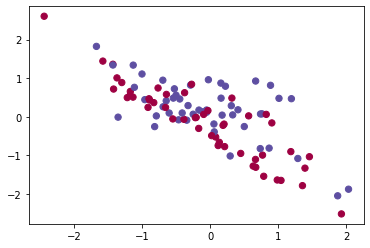

In [3]:
#@title Dataset Parameters  { run: "auto" }
number_samples = 100 #@param {type:"slider", min:100, max:1000, step:25}
difficulty = 4 #@param {type:"slider", min:1, max:5, step:1}
problem = "classification" #@param ["classification", "blobs", "gaussian quantiles", "moons", "circles"]
number_features = 2
number_classes = 2 
middle_layer = 5 #@param {type:"slider", min:5, max:25, step:1}
epochs = 25000 #@param {type:"slider", min:1000, max:50000, step:1000}

def load_data(problem):  
  if problem == "classification":
    clusters = 1 if difficulty < 3 else 2
    informs = 1 if difficulty < 4 else 2
    data = sklearn.datasets.make_classification(
        n_samples = number_samples,
        n_features=number_features, 
        n_redundant=0, 
        class_sep=1/difficulty,
        n_informative=informs, 
        n_clusters_per_class=clusters)
    
  if problem == "blobs":
    data = sklearn.datasets.make_blobs(
        n_samples = number_samples,
        n_features=number_features, 
        centers=number_classes,
        cluster_std = difficulty)
  
  if problem == "gaussian quantiles":
    data = sklearn.datasets.make_gaussian_quantiles(mean=None, 
                                                  cov=difficulty,
                                                  n_samples=number_samples,
                                                  n_features=number_features,
                                                  n_classes=number_classes,
                                                  shuffle=True,
                                                  random_state=None)
    
  if problem == "moons":
    data = sklearn.datasets.make_moons(
        n_samples = number_samples)
    
  if problem == "circles":
    data = sklearn.datasets.make_circles(
        n_samples = number_samples)
    
  return data

data = load_data(problem)
X, Y = data


# Input Data
plt.figure("Input Data")
plt.scatter(X[:, 0], X[:, 1], c=Y, s=40, cmap=plt.cm.Spectral)

In [4]:
#@title Helper Function to Show Model Predictions
def show_predictions(model, X, Y, name=""):
    """ display the labeled data X and a surface of prediction of model """
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    X_temp = np.c_[xx.flatten(), yy.flatten()]
    Z = model.predict(X_temp)
    plt.figure("Predictions " + name)
    plt.contourf(xx, yy, Z.reshape(xx.shape), cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[:, 0], X[:, 1],c=Y, s=40, cmap=plt.cm.Spectral)    

Logistic Regression accuracy :  0.64


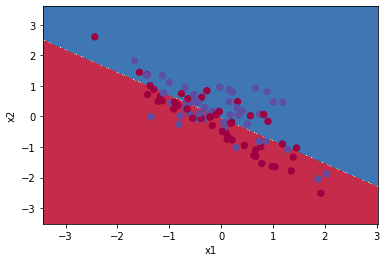

In [5]:
#@title Logisitc Regression with SKLearn
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X, Y)

show_predictions(clf, X, Y, "Logistic regression")
    
LR_predictions = clf.predict(X)
print("Logistic Regression accuracy : ", np.sum(LR_predictions == Y) / Y.shape[0])

In [6]:
#@title MLP in NumPy
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x)) 

## Neural Network
class Neural_Network:
    def __init__(self, n_in, n_hidden, n_out):
        # Network dimensions
        self.n_x = n_in
        self.n_h = n_hidden
        self.n_y = n_out
        
        # Parameters initialization
        self.W1 = np.random.randn(self.n_h, self.n_x) * 0.01
        self.b1 = np.zeros((self.n_h, 1))
        self.W2 = np.random.randn(self.n_y, self.n_h) * 0.01
        self.b2 = np.zeros((self.n_y, 1))

    def forward(self, X):
        """ Forward computation """
        self.Z1 = self.W1.dot(X.T) + self.b1
        self.A1 = np.tanh(self.Z1)
        self.Z2 = self.W2.dot(self.A1) + self.b2
        self.A2 = sigmoid(self.Z2)
    
    def back_prop(self,  X, Y):
        """ Back-progagate gradient of the loss """
        m = X.shape[0]
        self.dZ2 = self.A2 - Y
        self.dW2 = (1 / m) * np.dot(self.dZ2, self.A1.T)
        self.db2 = (1 / m) * np.sum(self.dZ2, axis=1, keepdims=True)
        self.dZ1 = np.multiply(np.dot(self.W2.T, self.dZ2), 1 - np.power(self.A1, 2))
        self.dW1 = (1 / m) * np.dot(self.dZ1, X)
        self.db1 = (1 / m) * np.sum(self.dZ1, axis=1, keepdims=True)

    def train(self, X, Y, epochs, learning_rate=1.2):
        """ Complete process of learning, alternates forward pass,
            backward pass and parameters update """
        m = X.shape[0]
        for e in range(epochs):
            self.forward(X)
            loss = -np.sum(np.multiply(np.log(self.A2), Y) + np.multiply(np.log(1-self.A2),  (1 - Y))) / m
            self.back_prop(X, Y)

            self.W1 -= learning_rate * self.dW1
            self.b1 -= learning_rate * self.db1
            self.W2 -= learning_rate * self.dW2
            self.b2 -= learning_rate * self.db2

            if e % 1000 == 0:
                print("Loss ",  e, " = ", loss)

    def predict(self, X):
        """ Compute predictions with just a forward pass """
        self.forward(X)
        return np.round(self.A2).astype(np.int)

Loss  0  =  0.6931417701697942
Loss  1000  =  0.5094364098231772
Loss  2000  =  0.5022382037000027
Loss  3000  =  0.498909269991107
Loss  4000  =  0.49691810778261486
Loss  5000  =  0.49534255664868176
Loss  6000  =  0.4941423754175605
Loss  7000  =  0.4932269327900285
Loss  8000  =  0.49251454391926197
Loss  9000  =  0.49194883573314985
Loss  10000  =  0.4914912406785208
Loss  11000  =  0.4911145838724984
Loss  12000  =  0.49079942524514275
Loss  13000  =  0.490531766801655
Loss  14000  =  0.49030144069447046
Loss  15000  =  0.4901009608986084
Loss  16000  =  0.48992472389322145
Loss  17000  =  0.48976846128747975
Loss  18000  =  0.4896288658970764
Loss  19000  =  0.4895033343554512
Loss  20000  =  0.48938978757339446
Loss  21000  =  0.4892865434933644
Loss  22000  =  0.48919222538593793
Loss  23000  =  0.4891056946609589
Loss  24000  =  0.48902600085932546


/var/folders/15/v4m8ny29795fzy6379yrfgz40000gn/T/ipykernel_76918/377557993.py:56: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.round(self.A2).astype(np.int)


Neural Network accuracy :  0.74


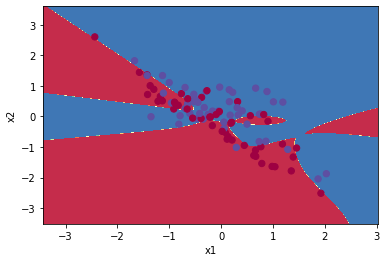

In [7]:
#@title Create the model and train it
nn = Neural_Network(2, middle_layer, 1)
nn.train(X, Y, epochs, 1.2)

show_predictions(nn, X, Y, "Neural Network")

nn_predictions = nn.predict(X)
print("Neural Network accuracy : ", np.sum(nn_predictions == Y) / Y.shape[0])